In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import knapsack_genetic as kga
import TravelingSalesmanProblem as tga

np.random.seed(0)
random.seed(404)

max_weight = 50
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
weights = [2, 7, 1, 9, 2, 10, 2, 6, 3, 7, 2, 1, 8, 2, 9, 1, 3, 10, 3, 4, 3, 9, 3, 5, 7, 5, 9, 1, 5, 6, 9, 10, 4, 2, 1, 5, 2, 7, 8, 7]

graph = tga.generate_city(60)

population_sizes = [200, 400, 600, 800, 1000]
elitism_proportions = [0.01, 0.05, 0.1, 0.2, 0.3]
crossover_rate = 0.6
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
gen_iter = 1000


## This will run for half an hour

In [11]:
experiment_results = []

for pop_size in population_sizes:
        for elitism_proportion in elitism_proportions:
                for mutation_rate in mutation_rates:
                    tournament_size = pop_size//10
                    best_solution, gen_solution_found, _ = kga.genetic_main_loop(max_weight, values, weights, pop_size, tournament_size, elitism_proportion, crossover_rate, mutation_rate, gen_iter)
                    experiment_results.append({
                        "Population Size": pop_size,
                        "Tournament Size": tournament_size,
                        "Elitism Proportion": elitism_proportion,
                        "Crossover Rate": crossover_rate,
                        "Mutation Rate": mutation_rate,
                        "Best Value for Solution Found": best_solution["value"],
                        "Generation Solution Found": gen_solution_found
                    })
                    print("Experiment with pop_size", pop_size, "elitism", elitism_proportion, "mutation_rate", mutation_rate, "DONE")

kga.save_results_to_csv(experiment_results, "knapsack_GA_experiment_results.csv")


Experiment with pop_size 200 elitism 0.01 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.3 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.3 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.3 DONE
Experiment with pop_size

## This will run for half an hour, too, beware

In [3]:
tga_experiment_results = []

for pop_size in population_sizes:
        for elitism_proportion in elitism_proportions:
                for mutation_rate in mutation_rates:
                    tournament_size = pop_size//10
                    best_solution, gen_solution_found, _ = tga.genetic_alg(graph, pop_size, tournament_size, elitism_proportion, crossover_rate, mutation_rate, gen_iter)
                    tga_experiment_results.append({
                        "Population Size": pop_size,
                        "Tournament Size": tournament_size,
                        "Elitism Proportion": elitism_proportion,
                        "Crossover Rate": crossover_rate,
                        "Mutation Rate": mutation_rate,
                        "Best Value for Solution Found": best_solution["score"],
                        "Generation Solution Found": gen_solution_found
                    })
                    print("Experiment with pop_size", pop_size, "elitism", elitism_proportion, "mutation_rate", mutation_rate, "DONE")

kga.save_results_to_csv(tga_experiment_results, "TSP_GA_experiment_results.csv")


Experiment with pop_size 200 elitism 0.01 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.01 mutation_rate 0.3 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.05 mutation_rate 0.3 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.01 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.05 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.1 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.2 DONE
Experiment with pop_size 200 elitism 0.1 mutation_rate 0.3 DONE
Experiment with pop_size

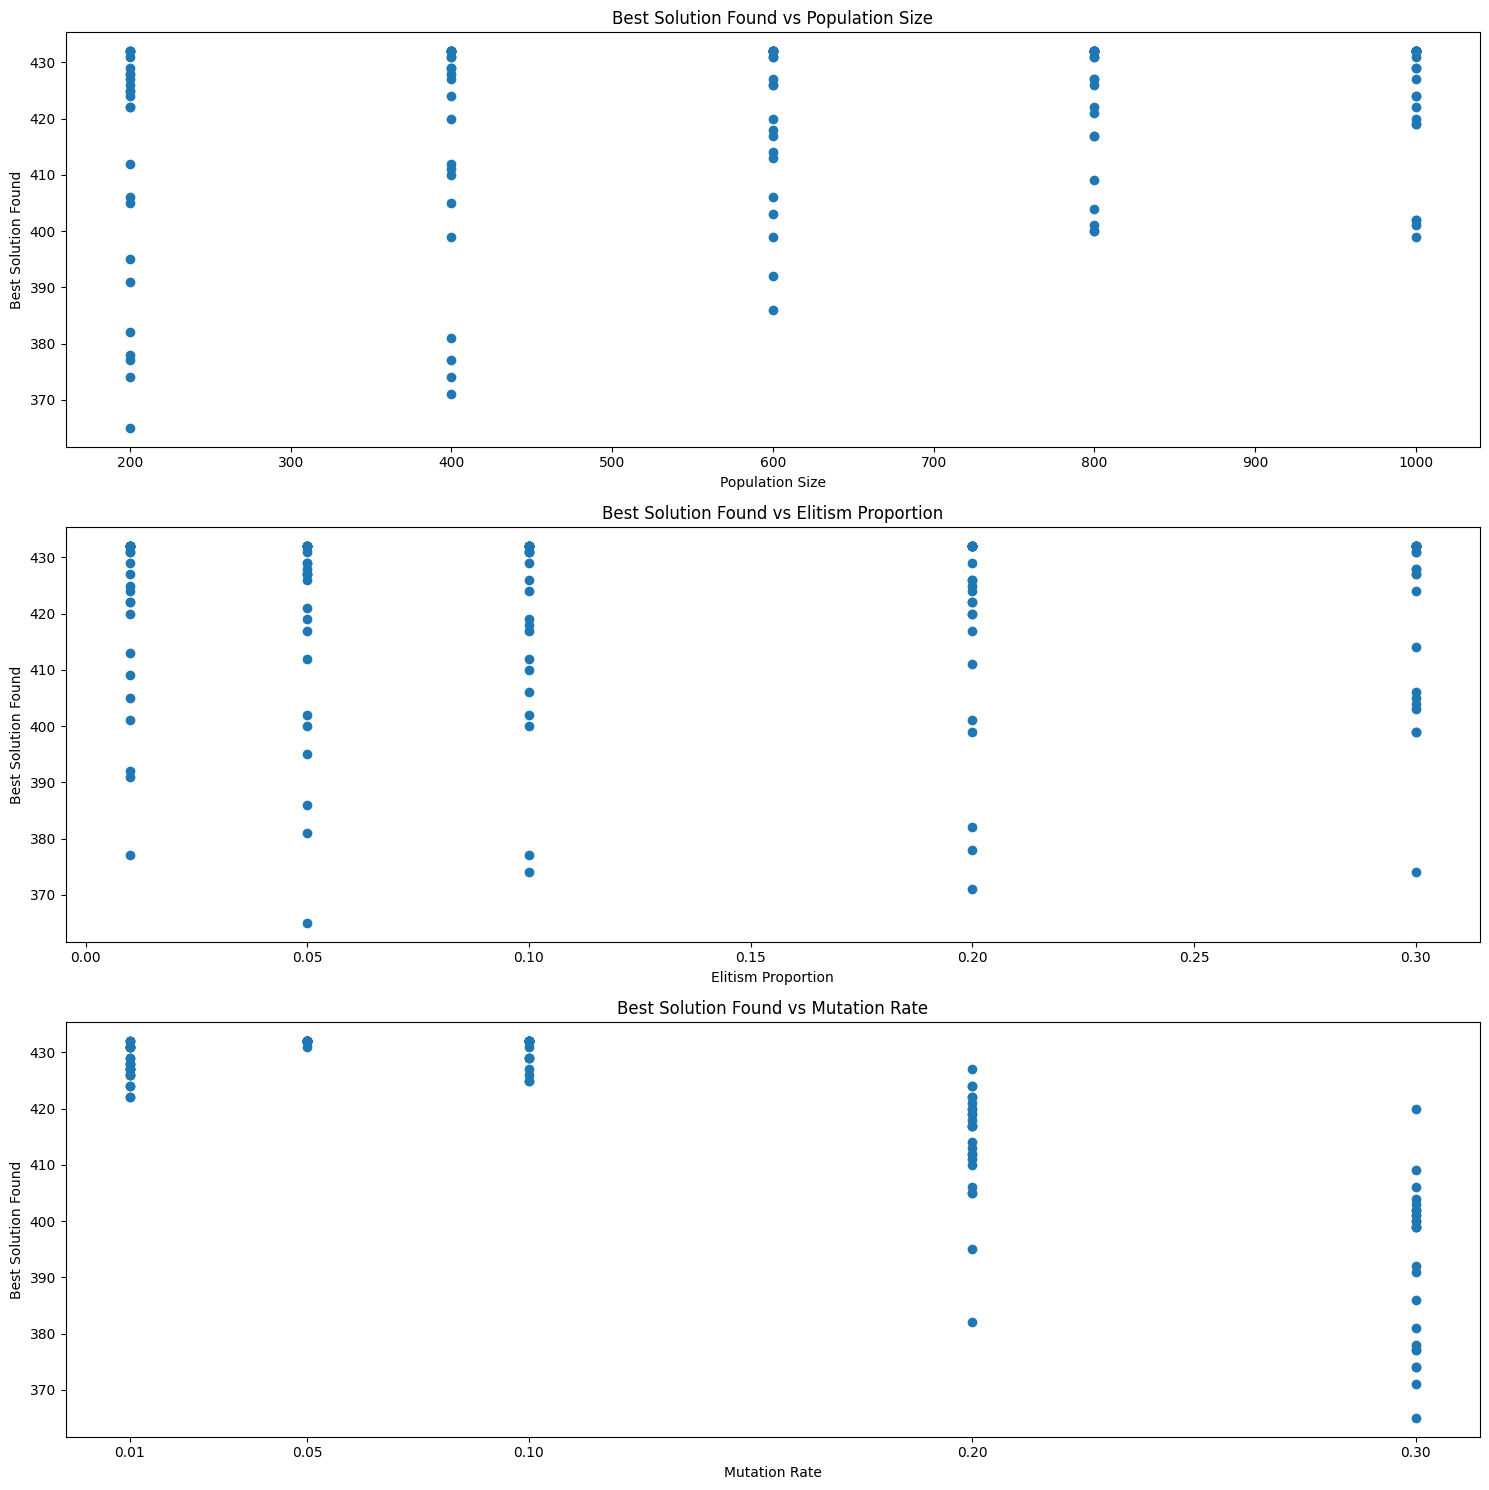

In [14]:
experiment_results = pd.read_csv("knapsack_GA_experiment_results.csv")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Population Size
axes[0].scatter(experiment_results["Population Size"], experiment_results["Best Value for Solution Found"])
axes[0].set_title("Best Solution Found vs Population Size")
axes[0].set_xlabel("Population Size")
axes[0].set_ylabel("Best Solution Found")

# Elitism Proportion
axes[1].scatter(experiment_results["Elitism Proportion"], experiment_results["Best Value for Solution Found"])
axes[1].set_title("Best Solution Found vs Elitism Proportion")
plt.xticks([0.01, 0.05, 0.1, 0.2, 0.3])
axes[1].set_xlabel("Elitism Proportion")
axes[1].set_ylabel("Best Solution Found")

# Mutation Rate
axes[2].scatter(experiment_results["Mutation Rate"], experiment_results["Best Value for Solution Found"])
axes[2].set_title("Best Solution Found vs Mutation Rate")
plt.xticks([0.01, 0.05, 0.1, 0.2, 0.3])
axes[2].set_xlabel("Mutation Rate")
axes[2].set_ylabel("Best Solution Found")

plt.tight_layout()
plt.show()


In [41]:
np.random.seed(0)
random.seed(404)

max_weight = 60
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
weights = [2, 7, 1, 9, 2, 10, 2, 6, 3, 7, 2, 1, 8, 2, 9, 1, 3, 10, 3, 4, 3, 9, 3, 5, 7, 5, 9, 1, 5, 6, 9, 10, 4, 2, 1, 5, 2, 7, 8, 7]

pop_size = 100
tournament_size = 10
elitism_proportion = 0
crossover_rates = np.arange(0.01, 1.01, 0.01)
mutation_rates = np.arange(0.01, 1.01, 0.01)
gen_iter = 1000

experiment_results = []
for cross in crossover_rates:
    best_solution, gen_solution_found, _ = kga.genetic_main_loop(max_weight, values, weights, pop_size, tournament_size, elitism_proportion, cross, 0, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Crossover Rate": cross,
        "Best Value for Solution Found": best_solution["value"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with crossover rate", cross, "DONE")


kga.save_results_to_csv(experiment_results, "knapsack_GA_crossover_experiment_results.csv")


Experiment with crossover rate 0.01 DONE
Experiment with crossover rate 0.02 DONE
Experiment with crossover rate 0.03 DONE
Experiment with crossover rate 0.04 DONE
Experiment with crossover rate 0.05 DONE
Experiment with crossover rate 0.060000000000000005 DONE
Experiment with crossover rate 0.06999999999999999 DONE
Experiment with crossover rate 0.08 DONE
Experiment with crossover rate 0.09 DONE
Experiment with crossover rate 0.09999999999999999 DONE
Experiment with crossover rate 0.11 DONE
Experiment with crossover rate 0.12 DONE
Experiment with crossover rate 0.13 DONE
Experiment with crossover rate 0.14 DONE
Experiment with crossover rate 0.15000000000000002 DONE
Experiment with crossover rate 0.16 DONE
Experiment with crossover rate 0.17 DONE
Experiment with crossover rate 0.18000000000000002 DONE
Experiment with crossover rate 0.19 DONE
Experiment with crossover rate 0.2 DONE
Experiment with crossover rate 0.21000000000000002 DONE
Experiment with crossover rate 0.22 DONE
Experime

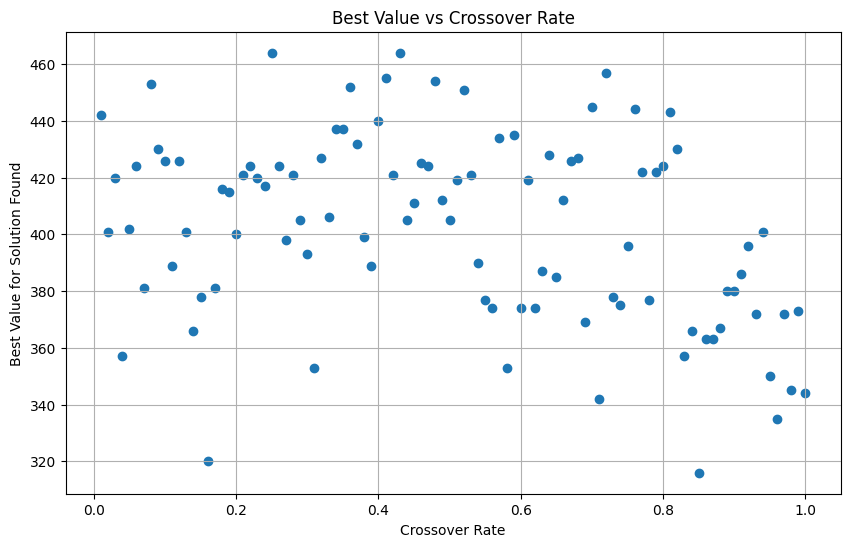

In [68]:
data = pd.read_csv("knapsack_GA_crossover_experiment_results.csv")
plt.figure(figsize=(10, 6))
# plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.title("Best Value vs Crossover Rate")
plt.xlabel("Crossover Rate")
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()


In [43]:
experiment_results = []
crossover_rate = 0.45
for mutate in mutation_rates:
    best_solution, gen_solution_found, _ = kga.genetic_main_loop(max_weight, values, weights, pop_size, tournament_size, elitism_proportion, crossover_rate, mutate, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Mutation Rate": mutate,
        "Best Value for Solution Found": best_solution["value"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with mutation rate", mutate, "DONE")


kga.save_results_to_csv(experiment_results, "knapsack_GA_mutation_experiment_results.csv")



Experiment with mutation rate 0.01 DONE
Experiment with mutation rate 0.02 DONE
Experiment with mutation rate 0.03 DONE
Experiment with mutation rate 0.04 DONE
Experiment with mutation rate 0.05 DONE
Experiment with mutation rate 0.060000000000000005 DONE
Experiment with mutation rate 0.06999999999999999 DONE
Experiment with mutation rate 0.08 DONE
Experiment with mutation rate 0.09 DONE
Experiment with mutation rate 0.09999999999999999 DONE
Experiment with mutation rate 0.11 DONE
Experiment with mutation rate 0.12 DONE
Experiment with mutation rate 0.13 DONE
Experiment with mutation rate 0.14 DONE
Experiment with mutation rate 0.15000000000000002 DONE
Experiment with mutation rate 0.16 DONE
Experiment with mutation rate 0.17 DONE
Experiment with mutation rate 0.18000000000000002 DONE
Experiment with mutation rate 0.19 DONE
Experiment with mutation rate 0.2 DONE
Experiment with mutation rate 0.21000000000000002 DONE
Experiment with mutation rate 0.22 DONE
Experiment with mutation rate 

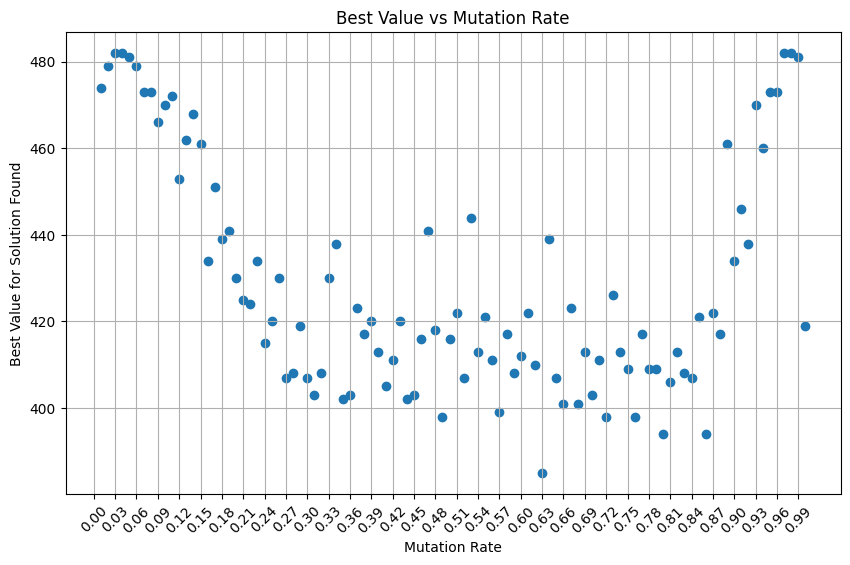

In [51]:
data = pd.read_csv("knapsack_GA_mutation_experiment_results.csv")
plt.figure(figsize=(10, 6))
plt.scatter(data["Mutation Rate"], data["Best Value for Solution Found"])
plt.title("Best Value vs Mutation Rate")
plt.xlabel("Mutation Rate")
plt.xticks(np.arange(0, 1, 0.03), rotation=45)
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()

In [52]:
graph = tga.generate_city(20)

pop_size = 100
tournament_size = 10
elitism_proportion = 0
crossover_rates = np.arange(0.01, 1.01, 0.01)
mutation_rates = np.arange(0.01, 1.01, 0.01)
gen_iter = 1000

experiment_results = []
for cross in crossover_rates:
    best_solution, gen_solution_found, _ = tga.genetic_alg(graph, pop_size, tournament_size, elitism_proportion, cross, 0, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Crossover Rate": cross,
        "Best Value for Solution Found": 1/best_solution["score"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with crossover rate", cross, "DONE")


kga.save_results_to_csv(experiment_results, "TSP_GA_crossover_experiment_results.csv")

Experiment with crossover rate 0.01 DONE
Experiment with crossover rate 0.02 DONE
Experiment with crossover rate 0.03 DONE
Experiment with crossover rate 0.04 DONE
Experiment with crossover rate 0.05 DONE
Experiment with crossover rate 0.060000000000000005 DONE
Experiment with crossover rate 0.06999999999999999 DONE
Experiment with crossover rate 0.08 DONE
Experiment with crossover rate 0.09 DONE
Experiment with crossover rate 0.09999999999999999 DONE
Experiment with crossover rate 0.11 DONE
Experiment with crossover rate 0.12 DONE
Experiment with crossover rate 0.13 DONE
Experiment with crossover rate 0.14 DONE
Experiment with crossover rate 0.15000000000000002 DONE
Experiment with crossover rate 0.16 DONE
Experiment with crossover rate 0.17 DONE
Experiment with crossover rate 0.18000000000000002 DONE
Experiment with crossover rate 0.19 DONE
Experiment with crossover rate 0.2 DONE
Experiment with crossover rate 0.21000000000000002 DONE
Experiment with crossover rate 0.22 DONE
Experime

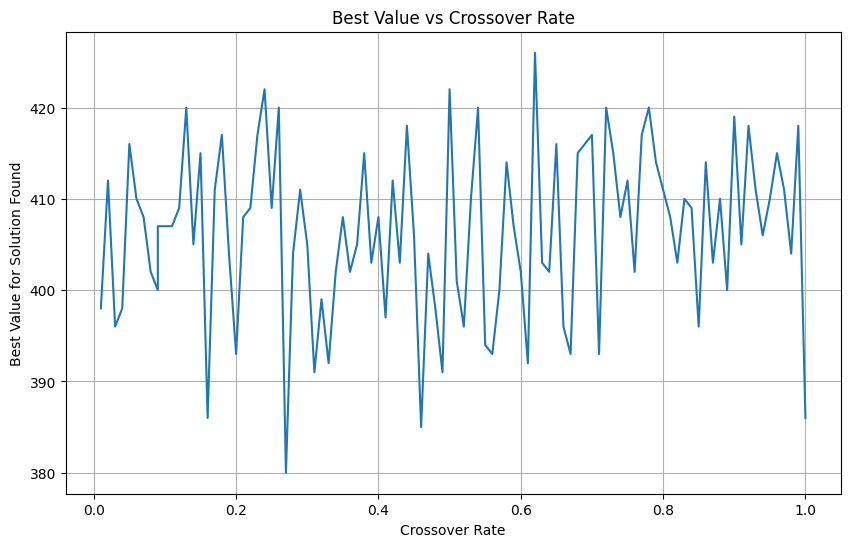

In [70]:
data = pd.read_csv("TSP_GA_crossover_experiment_results.csv")
plt.figure(figsize=(10, 6))
# plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.plot(data["Crossover Rate"], 1/data["Best Value for Solution Found"])
plt.title("Best Value vs Crossover Rate")
plt.xlabel("Crossover Rate")
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()


In [56]:
experiment_results = []
crossover_rate = 0.45
for mutate in mutation_rates:
    best_solution, gen_solution_found, _ = tga.genetic_alg(graph, pop_size, tournament_size, elitism_proportion, crossover_rate, mutate, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Mutation Rate": mutate,
        "Best Value for Solution Found": 1/best_solution["score"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with mutation rate", mutate, "DONE")


kga.save_results_to_csv(experiment_results, "TSP_GA_mutation_experiment_results.csv")



Experiment with mutation rate 0.01 DONE
Experiment with mutation rate 0.02 DONE
Experiment with mutation rate 0.03 DONE
Experiment with mutation rate 0.04 DONE
Experiment with mutation rate 0.05 DONE
Experiment with mutation rate 0.060000000000000005 DONE
Experiment with mutation rate 0.06999999999999999 DONE
Experiment with mutation rate 0.08 DONE
Experiment with mutation rate 0.09 DONE
Experiment with mutation rate 0.09999999999999999 DONE
Experiment with mutation rate 0.11 DONE
Experiment with mutation rate 0.12 DONE
Experiment with mutation rate 0.13 DONE
Experiment with mutation rate 0.14 DONE
Experiment with mutation rate 0.15000000000000002 DONE
Experiment with mutation rate 0.16 DONE
Experiment with mutation rate 0.17 DONE
Experiment with mutation rate 0.18000000000000002 DONE
Experiment with mutation rate 0.19 DONE
Experiment with mutation rate 0.2 DONE
Experiment with mutation rate 0.21000000000000002 DONE
Experiment with mutation rate 0.22 DONE
Experiment with mutation rate 

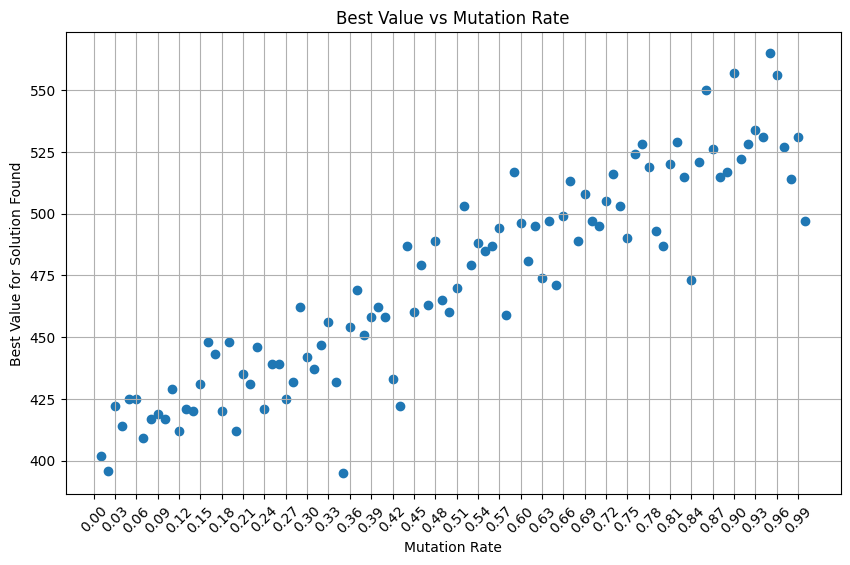

In [69]:
data = pd.read_csv("TSP_GA_mutation_experiment_results.csv")
plt.figure(figsize=(10, 6))
plt.scatter(data["Mutation Rate"], 1/data["Best Value for Solution Found"])
plt.title("Best Value vs Mutation Rate")
plt.xlabel("Mutation Rate")
plt.xticks(np.arange(0, 1, 0.03), rotation=45)
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()

In [62]:
experiment_results = []
for cross in crossover_rates:
    best_solution, gen_solution_found, _ = kga.genetic_main_loop(max_weight, values, weights, pop_size, tournament_size, elitism_proportion, cross, 0.03, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Crossover Rate": cross,
        "Best Value for Solution Found": best_solution["value"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with crossover rate", cross, "DONE")


kga.save_results_to_csv(experiment_results, "knapsack_GA_crossover_after_mutation_experiment_results.csv")


Experiment with crossover rate 0.01 DONE
Experiment with crossover rate 0.02 DONE
Experiment with crossover rate 0.03 DONE
Experiment with crossover rate 0.04 DONE
Experiment with crossover rate 0.05 DONE
Experiment with crossover rate 0.060000000000000005 DONE
Experiment with crossover rate 0.06999999999999999 DONE
Experiment with crossover rate 0.08 DONE
Experiment with crossover rate 0.09 DONE
Experiment with crossover rate 0.09999999999999999 DONE
Experiment with crossover rate 0.11 DONE
Experiment with crossover rate 0.12 DONE
Experiment with crossover rate 0.13 DONE
Experiment with crossover rate 0.14 DONE
Experiment with crossover rate 0.15000000000000002 DONE
Experiment with crossover rate 0.16 DONE
Experiment with crossover rate 0.17 DONE
Experiment with crossover rate 0.18000000000000002 DONE
Experiment with crossover rate 0.19 DONE
Experiment with crossover rate 0.2 DONE
Experiment with crossover rate 0.21000000000000002 DONE
Experiment with crossover rate 0.22 DONE
Experime

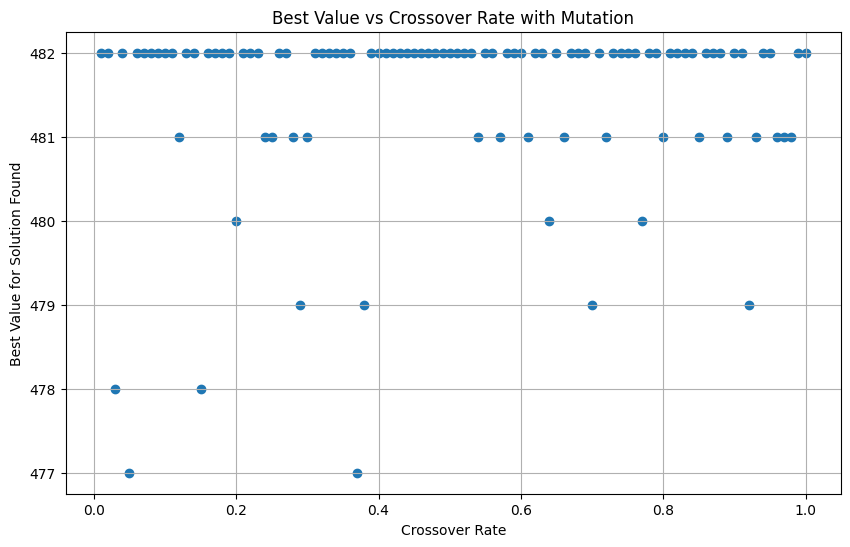

In [66]:
data = pd.read_csv("knapsack_GA_crossover_after_mutation_experiment_results.csv")
plt.figure(figsize=(10, 6))
# plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.title("Best Value vs Crossover Rate with Mutation")
plt.xlabel("Crossover Rate")
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()

In [64]:
experiment_results = []
for cross in crossover_rates:
    best_solution, gen_solution_found, _ = tga.genetic_alg(graph, pop_size, tournament_size, elitism_proportion, cross, 0.03, gen_iter)
    experiment_results.append({
        "Population Size": pop_size,
        "Tournament Size": tournament_size,
        "Crossover Rate": cross,
        "Best Value for Solution Found": 1/best_solution["score"],
        "Generation Solution Found": gen_solution_found
    })
    print("Experiment with crossover rate", cross, "DONE")


kga.save_results_to_csv(experiment_results, "TSP_GA_crossover_after_mutation_experiment_results.csv")

Experiment with crossover rate 0.01 DONE
Experiment with crossover rate 0.02 DONE
Experiment with crossover rate 0.03 DONE
Experiment with crossover rate 0.04 DONE
Experiment with crossover rate 0.05 DONE
Experiment with crossover rate 0.060000000000000005 DONE
Experiment with crossover rate 0.06999999999999999 DONE
Experiment with crossover rate 0.08 DONE
Experiment with crossover rate 0.09 DONE
Experiment with crossover rate 0.09999999999999999 DONE
Experiment with crossover rate 0.11 DONE
Experiment with crossover rate 0.12 DONE
Experiment with crossover rate 0.13 DONE
Experiment with crossover rate 0.14 DONE
Experiment with crossover rate 0.15000000000000002 DONE
Experiment with crossover rate 0.16 DONE
Experiment with crossover rate 0.17 DONE
Experiment with crossover rate 0.18000000000000002 DONE
Experiment with crossover rate 0.19 DONE
Experiment with crossover rate 0.2 DONE
Experiment with crossover rate 0.21000000000000002 DONE
Experiment with crossover rate 0.22 DONE
Experime

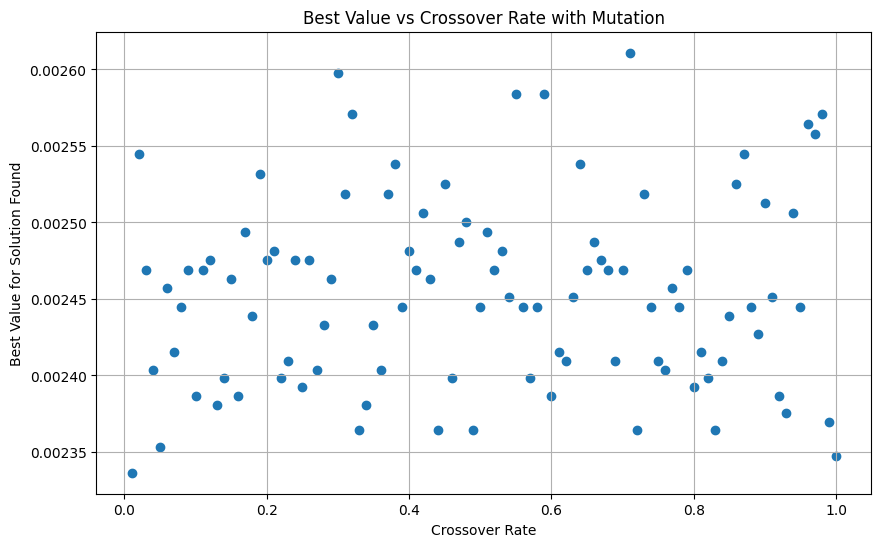

In [67]:
data = pd.read_csv("TSP_GA_crossover_after_mutation_experiment_results.csv")
plt.figure(figsize=(10, 6))
# plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.scatter(data["Crossover Rate"], data["Best Value for Solution Found"])
plt.title("Best Value vs Crossover Rate with Mutation")
plt.xlabel("Crossover Rate")
plt.ylabel("Best Value for Solution Found")
plt.grid(True)
plt.show()